In [1]:
import pandas as pd

In [2]:
# Weather data from NOAA's "Data At a Glance"
tampa = pd.read_csv('TampaAvgHighsApr.csv')
tampa.head()

,Date,Value,Anomaly
0,193904,72.9,0.9
1,194004,69.2,-2.8
2,194104,71.5,-0.5
3,194204,70.4,-1.6
4,194304,71.5,-0.5


In [3]:
# Renaming columns for readability
tampa.columns = ['Year', 'Temperature', 'Anomaly']
tampa.head()

,Year,Temperature,Anomaly
0,193904,72.9,0.9
1,194004,69.2,-2.8
2,194104,71.5,-0.5
3,194204,70.4,-1.6
4,194304,71.5,-0.5


In [4]:
# Truncating last two digits of every value in 'Year' column
tampa.Year = tampa.Year.floordiv(100)
tampa.head()

,Year,Temperature,Anomaly
0,1939,72.9,0.9
1,1940,69.2,-2.8
2,1941,71.5,-0.5
3,1942,70.4,-1.6
4,1943,71.5,-0.5


In [5]:
# Basic statistics
pd.set_option('precision', 2)
tampa.Temperature.describe()

count    83.00
mean     72.52
std       2.37
min      66.40
25%      71.05
50%      72.60
75%      74.15
max      78.10
Name: Temperature, dtype: float64

In [6]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    tampa.Year.values.reshape(-1, 1), tampa.Temperature.values,
    random_state=24) # Seed chosen arbitrarily

In [7]:
# Train a LinearRegression estimator
from sklearn.linear_model import LinearRegression
tampa_lr = LinearRegression()
tampa_lr.fit(X=X_train, y=y_train)

LinearRegression()

In [8]:
# Test the model
predicted = tampa_lr.predict(X_test)
expected = y_test
for p, e in zip(predicted[::3], expected[::3]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 72.60, expected: 73.90
predicted: 72.13, expected: 70.10
predicted: 72.15, expected: 72.90
predicted: 73.53, expected: 75.90
predicted: 73.20, expected: 72.60
predicted: 73.12, expected: 72.20
predicted: 72.35, expected: 74.10


In [9]:
# Slope
tampa_lr.coef_

array([0.02761351])

In [10]:
tampa_lr.intercept_

17.94805984769812

In [11]:
# Function to estimate/predict temperatures
estimate = (lambda x: tampa_lr.coef_ * x + tampa_lr.intercept_)

In [12]:
# Approximate temperature in 1989, actual value 71.8
estimate(1989)

array([72.87133131])

In [13]:
# Predict temperature in 2040
estimate(2040)

array([74.27962032])

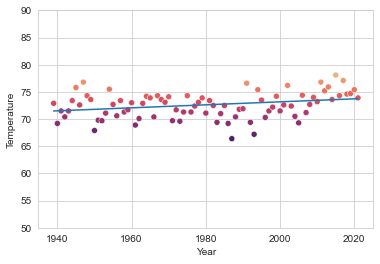

In [14]:
# Plot scatterplot
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.scatterplot(x=tampa.Year, y=tampa.Temperature, hue=tampa.Temperature, 
                       palette='flare_r', legend=False)
axes.set_ylim(50, 90) # Emphasizes linear relationship

# Display regression line
import numpy as np
x = np.array([min(tampa.Year.values), max(tampa.Year.values)]) # Start and end points (x-coordinates)
y = estimate(x) # Corresponding estimated values (y-coordinates)
import matplotlib.pyplot as plt
line = plt.plot(x, y)